In [114]:
# import statements
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math

## SIR Model example: change dt to view different solution behavior

In [115]:
# define SIR_model
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -S*I*beta(t)
    dIdt = S*I*beta(t) - I*gamma(t)
    dRdt = I*gamma(t)
    return dSdt, dIdt, dRdt

#  plot SIDARTHE model
def plotSIR(t, S, I, R):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='S')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='I')
    ax.plot(t, R, 'r--', alpha=0.7, linewidth=2, label='R')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Fraction of population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();

In [124]:
# set parameter values
def beta(t): return np.piecewise(t, [t>=0], [0.011])
def gamma(t): return np.piecewise(t, [t>=0], [0.456])

# set initial conditions
N0 = 60e6
I0, R0 = 30e6/N0, 0
S0 = 1-I0-R0
y0 = S0, I0, R0 # Initial conditions vector

# set simulation parameters
dt = 5
tstart = 0
tend = 100
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SIR_model, y0, tvect, args=(beta, gamma), printmessg=True, full_output=True)
print(sim[1])
S, I, R = sim[0].T


{'hu': array([ 0.36804879,  0.44389202,  0.51423889,  0.69406458,  0.78689192,
        0.99874218,  1.22068488,  1.27617056,  1.27617056,  6.72099095,
        6.72099095,  6.72099095,  6.72099095, 67.20990949, 67.20990949,
       67.20990949, 67.20990949, 67.20990949, 67.20990949]), 'tcur': array([  5.21853943,  10.24187076,  15.17321903,  20.44534676,
        25.58228083,  30.1522912 ,  35.81183019,  40.86102674,
        45.96570897,  52.68669992,  59.40769086,  66.12868181,
        66.12868181, 133.33859131, 133.33859131, 133.33859131,
       133.33859131, 133.33859131, 133.33859131]), 'tolsf': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'tsw': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 45.96570897, 45.96570897,
       45.96570897, 45.96570897, 45.96570897, 45.96570897, 45.96570897,
       45.96570897, 45.96570897, 45.96570897, 45.96570897]), 'nst': array([32, 44

/var/folders/fg/63k_244d5jg2d0hp2j_fb21w0000gp/T/ipykernel_84046/3337827061.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


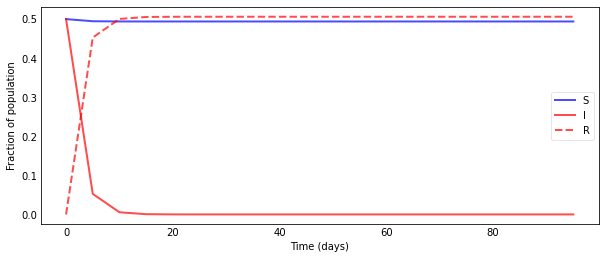

In [119]:

# plot results
plotSIR(tvect, S, I, R)

## Logistic equation: solution is known so can view the impact of adaptive methods

$$\dfrac{dP}{dt} = rP\left(1-\dfrac{P}{K}\right)$$

$P$: population 

$t$: time 

$K$: carrying capacity of the population 

$r$: population growth rate 

## Solution:

Given the initial population $P_0$, the population at time $t$ is given by

$$P(t) = \dfrac{P_0Ke^{rt}}{(K-P_0) + P_0e^{rt}}$$

(reference: https://math.libretexts.org/Bookshelves/Calculus/Calculus_(OpenStax)/08%3A_Introduction_to_Differential_Equations/8.04%3A_The_Logistic_Equation)

## Example logistic

$r = 0.5$

$K = 1,000,000$

$P_0 = 100,000$

In [56]:
# define logistic model
def logistic_model(y, t, K, r):
    P = y
    dPdt = r*P*(1-P/K)
    return dPdt

#  plot logistic model
def plotLogistic(t, P, P_exact):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, P, 'b', alpha=0.7, linewidth=2, label='Population')
    ax.plot(t, P_exact, 'g', alpha=0.7, linewidth=2, label='Exact solution')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();
    
def logistic_exact_solution(P0, K, r, t):
    ans = (P0*K*(np.exp(r*t))/((K-P0)+P0*(np.exp(r*t))))
    return ans

In [57]:
print(logistic_exact_solution(1e5,1e6,0.5,20))
print(logistic_exact_solution(1e5,1e6,0.5,np.arange(0,20,5)))

999591.5675173918
[100000.         575120.85136451 942825.61857401 995046.89602818]


(80, 1)
(80, 1)
0.03890229988610372


/var/folders/fg/63k_244d5jg2d0hp2j_fb21w0000gp/T/ipykernel_84046/1596854177.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


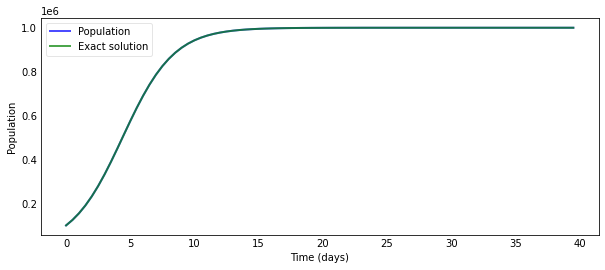

In [77]:
# set parameter values
# def r(t): return np.piecewise(t, [t>=0], [0.5])
# def K(t): return np.piecewise(t, [t>=0], [1e6])

r=0.5
K=1e6

# set initial conditions
P0 = 1e5
y0 = P0 # Initial conditions vector

# set simulation parameters
dt = .5
tstart = 0
tend = 40
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(logistic_model, y0, tvect, args=(K, r))
P = sim
P_exact = (logistic_exact_solution(P0, K, r, tvect)).reshape(-1,1)
print(np.shape(P))
print(np.shape(P_exact))
print(np.max(np.abs(P-P_exact)))

# plot results
plotLogistic(tvect, P, P_exact)

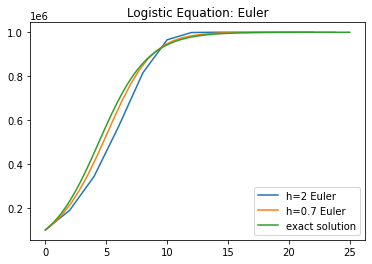

In [71]:
## Logistic Euler example

import numpy as np
import matplotlib.pyplot as plt

def euler_logistic(h, t_max):
    """
    Solve the logistic equation using
    the Euler method. 

    Integrate from t=0 to t=t_max using stepsize h for
    num_steps = t_max / h.
    
    Returns two arrays of length num_steps: t, the time coordinate, and x_0, the position.
    """
    num_steps = int(t_max / h)
    # Allocate return arrays
    x = np.zeros(num_steps, dtype=np.float32)
    t = np.zeros(num_steps, dtype=np.float32)
    x[0] = 1e5  # Initial condition
    K = 1e6
    r = 0.5
    for i in range(num_steps - 1):
        x[i+1] = x[i] + h*r*x[i]*(1-x[i]/K)
        t[i+1] = t[i] + h  # Time step
    return t, x

t_max = 25
t, x = euler_logistic(2, t_max)
plt.plot(t, x, label="h=2 Euler")
t, x = euler_logistic(0.7, t_max)
plt.plot(t, x, label="h=0.7 Euler")
t = np.linspace(0, t_max, 100)
plt.plot(t, logistic_exact_solution(1e5, 1e6, 0.5, t), label="exact solution")
plt.title("Logistic Equation: Euler")
plt.legend()
plt.show()

In [109]:
## Example: Logistic equation with simple adaptive time stepping

import numpy as np
import matplotlib.pyplot as plt

def euler_logistic_adaptive(h, t_max):
    """
    Solve the logistic equation using
    the Euler method. 

    Integrate from t=0 to t=t_max using stepsize h for
    num_steps = t_max / h.
    
    Returns two arrays of length num_steps: t, the time coordinate, and x_0, the position.
    """
#     num_steps = int(t_max / h)
#     # Allocate return arrays
#     x = np.zeros(num_steps, dtype=np.float32)
#     t = np.zeros(num_steps, dtype=np.float32)
    tol_1 = 0.25
    tol_2 = 0.01
    x = [1e5]  # Initial condition
    t = [0] # Initial time
    K = 1e6
    r = 0.5
    i = 1
    #for i in range(1,int(t_max/h)):
    while t[-1] < t_max:
        s1 = r*x[i-1]*(1-x[i-1]/K) ## change to x[i]
        yfe = x[i-1] + h*s1
        s2 = r*yfe*(1-yfe/K)
        yh = x[i-1] + (h/2)*(s1 + s2)
        delta = abs(yfe-yh)
#         print(delta)
        if delta > tol_1:
            h = h/2
        elif delta < tol_2:
            h = 2*h
        print(h)
        x.append(x[i-1] + h*s1)
        t.append(t[i-1] + h)
        i += 1
    plt.plot(t,x)


0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.00390625
0.0039062

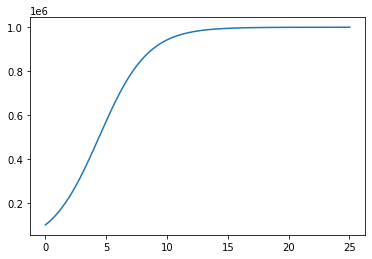

In [110]:
t_max = 25
# print(euler_logistic_adaptive(0.5, t_max))

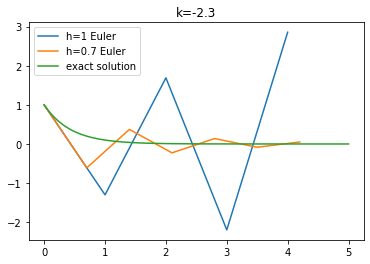

In [73]:
## Skip: original Euler example x' = kx  (has solution x(t) = e^(kt))

import numpy as np
import matplotlib.pyplot as plt

def euler(h, t_max, k=1):
    """
    Solve the equation x' = k x, with x(0) = 1 using
    the Euler method. 

    Integrate from t=0 to t=t_max using stepsize h for
    num_steps = t_max / h.
    
    Returns two arrays of length num_steps: t, the time coordinate, and x_0, the position.
    """
    num_steps = int(t_max / h)
    # Allocate return arrays
    x = np.zeros(num_steps, dtype=np.float32)
    t = np.zeros(num_steps, dtype=np.float32)
    x[0] = 1.0  # Initial condition
    for i in range(num_steps - 1):
        x[i+1] = x[i] + k * x[i] * h
        t[i+1] = t[i] + h  # Time step
    return t, x

k = -2.3
t_max = 5
t, x = euler(1, t_max, k)
plt.plot(t, x, label="h=1 Euler")
t, x = euler(0.7, t_max, k)
plt.plot(t, x, label="h=0.7 Euler")
t = np.linspace(0, t_max, 100)
plt.plot(t, np.exp(k * t), label="exact solution")
plt.title("k=-2.3")
plt.legend()
plt.show()

## Simple SIR Euler simulation

In [197]:
def sir_euler(S0, I0, R0, beta, gamma, t):
    # Initialization
    S = [S0]
    I = [I0]
    R = [R0]
    for i in range(len(t)-1):
        S_new = S[i] - beta*S[i]*I[i]*(t[i+1]-t[i])
        I_new = I[i] + (beta*S[i]*I[i] - gamma*I[i])*(t[i+1]-t[i])
        R_new = R[i] + gamma*I[i]*(t[i+1]-t[i])
        S.append(S_new)
        I.append(I_new)
        R.append(R_new)
    return [S, I, R, t]
        
        

In [198]:
ans_uniform_time = sir_euler(0.9, 0.1, 0, 0.5, 0.1, np.linspace(0,60,60))

In [199]:
def plot_sir(sir_euler_ans):
    S = sir_euler_ans[0]
    I = sir_euler_ans[1]
    R = sir_euler_ans[2]
    t = sir_euler_ans[3]
    plt.plot(t,S, label='S')
    plt.plot(t,I, label='I')
    plt.plot(t,R, label='R')
    plt.legend()

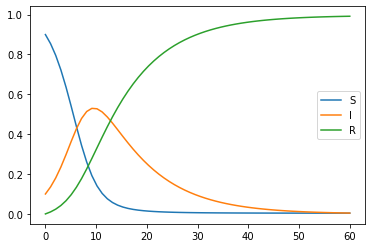

In [200]:
plot_sir(ans_uniform_time)

## Parameter Heuristics: gamma

Increasing gamma leads to lower $I$ peak that lasts for a shorter period of time

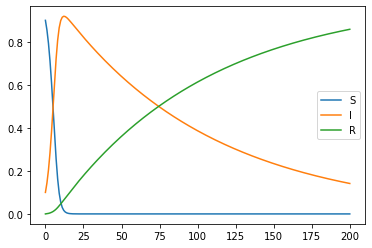

In [201]:
plot_sir(sir_euler(0.9, 0.1, 0, 0.5, 0.01, np.linspace(0,200,200)))

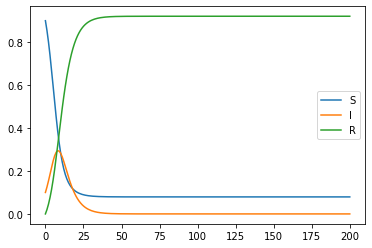

In [202]:
plot_sir(sir_euler(0.9, 0.1, 0, 0.5, 0.2, np.linspace(0,200,200)))

## Parameter Heuristics: beta

Increasing beta leads to a higher and narrower peak for $I$

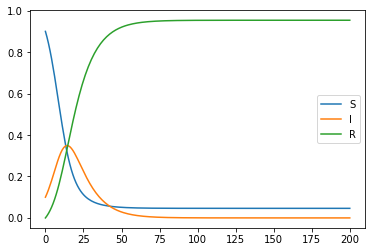

In [203]:
plot_sir(sir_euler(0.9, 0.1, 0, 0.3, 0.1, np.linspace(0,200,200)))

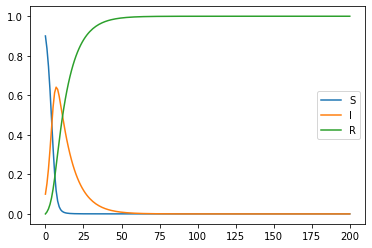

In [204]:
plot_sir(sir_euler(0.9, 0.1, 0, 0.7, 0.1, np.linspace(0,200,200)))

## Different time steps

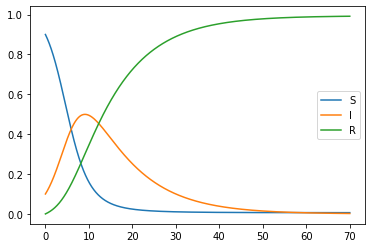

In [214]:
sol_10000_steps = sir_euler(0.9, 0.1, 0, 0.5, 0.1, np.linspace(0,70,10000))
plot_sir(sol_10000_steps)

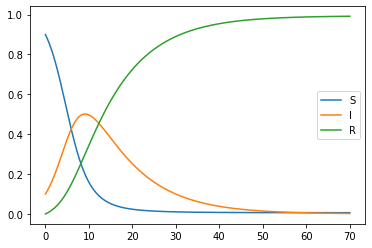

In [209]:
sol_1000_steps = sir_euler(0.9, 0.1, 0, 0.5, 0.1, np.linspace(0,70,1000))
plot_sir(sol_1000_steps)

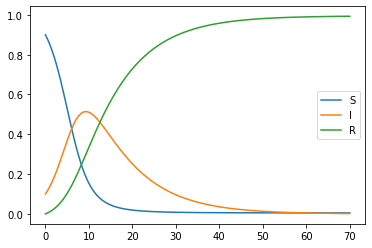

In [205]:
sol_140_steps = sir_euler(0.9, 0.1, 0, 0.5, 0.1, np.linspace(0,70,140))
plot_sir(sol_140_steps)

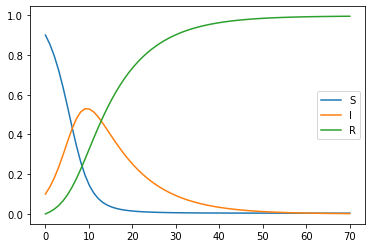

In [206]:
sol_70_steps = sir_euler(0.9, 0.1, 0, 0.5, 0.1, np.linspace(0,70,70))
plot_sir(sol_70_steps)

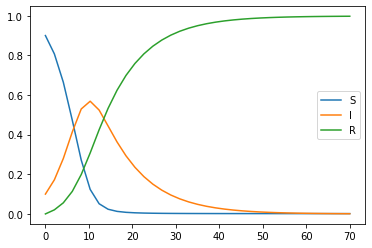

In [207]:
sol_35_steps = sir_euler(0.9, 0.1, 0, 0.5, 0.1, np.linspace(0,70,35))
plot_sir(sol_35_steps)

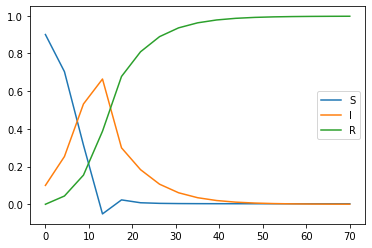

In [212]:
sol_17_steps = sir_euler(0.9, 0.1, 0, 0.5, 0.1, np.linspace(0,70,17))
plot_sir(sol_17_steps)

## Compare I from different time steps

In [215]:
print(max(sol_10000_steps[1]))
print(max(sol_1000_steps[1]))
print(max(sol_140_steps[1]))
print(max(sol_70_steps[1]))
print(max(sol_35_steps[1]))
print(max(sol_17_steps[1]))

0.4993868725323183
0.5012176612020767
0.5138842307896676
0.529459392536587
0.568649783185759
0.6640700837859187


## "Adaptive" time steps (manually designed)

Still using 70 time steps, but making steps smaller for the first 30 time steps
Achieves performance closer to 140 uniform steps

In [236]:
t_array_1 = np.linspace(0,30,60)
t_array_2 = np.linspace(31,70,10)
adaptive_t_array = np.concatenate((t_array_1, t_array_2))

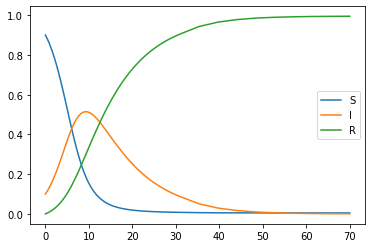

In [237]:
sol_70_steps_adaptive = sir_euler(0.9, 0.1, 0, 0.5, 0.1, adaptive_t_array)
plot_sir(sol_70_steps_adaptive)

In [238]:
print(max(sol_140_steps[1]))
print(max(sol_70_steps_adaptive[1]))
print(max(sol_70_steps[1]))

0.5138842307896676
0.5142655462340526
0.529459392536587


In the cell above, we see that 70 time steps with adaptive stepping performs more similarly to 140 uniform steps than 70 uniform steps.

## Similar adaptive timestep arrays, but with different parameters

In [243]:
sol_70_steps_new_params = sir_euler(0.9, 0.1, 0, 0.9, 0.2, np.linspace(0,70,70))
sol_70_steps_new_params_adaptive = sir_euler(0.9, 0.1, 0, 0.9, 0.2, adaptive_t_array)
sol_140_steps_new_params = sir_euler(0.9, 0.1, 0, 0.9, 0.2, np.linspace(0,70,140))

In [244]:
print(max(sol_140_steps_new_params[1]))
print(max(sol_70_steps_new_params_adaptive[1]))
print(max(sol_70_steps_new_params[1]))

0.4934110159767478
0.4939912611993195
0.5203876011198787


In the cell above, we see that 70 time steps with adaptive stepping performs more similarly to 140 uniform steps than 70 uniform steps.